In [217]:
# Import Important Libraries
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

# Data Reading and Understandig

In [218]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [220]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [221]:
data.shape

(9240, 37)

In [222]:
#checking for the duplicates
data[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


# Data cleaning

In [223]:
data['Asymmetrique Activity Index'] = data["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
data['Asymmetrique Profile Index'] = data["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


In [224]:
# Dropping columns that have only one unique values for all the leads.
cols = []
for i in data.columns:
    if data[i].nunique() ==1:
        cols.append(i)
data.drop(cols, axis =1,inplace = True)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


In [225]:
# Dropping Prospect ID
# Lead Number & Prospect ID have all unique values. We will keep Lead Number for identification of the lead.

data = data.drop(['Prospect ID'], 1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


In [226]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Might be'),
  Text(2, 0, 'Not Sure'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

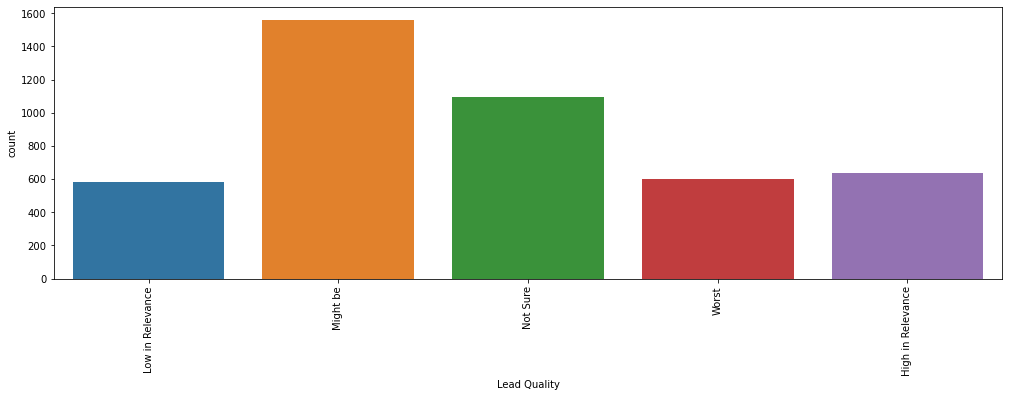

In [227]:
## Lead Quality has 52% misssing values
plt.figure(figsize=(17,5))
sns.countplot(data['Lead Quality'])
plt.xticks(rotation=90)

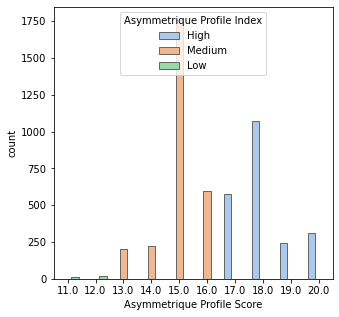

In [228]:
# Now observe the index and score assigned to each customer based on their activity and their profile
plt.figure(figsize = (5,5))
# sns.set(style="darkgrid")
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = data, palette="pastel", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

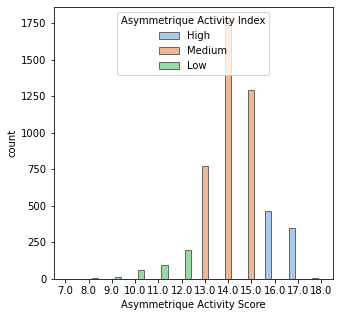

In [229]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = data, palette="pastel", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

In [230]:
# Dropping 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score'.
cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']
data.drop(cols, axis = 1, inplace = True)

In [231]:
data.shape

(9240, 29)

In [232]:
# Columns having select values
data.columns[data.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

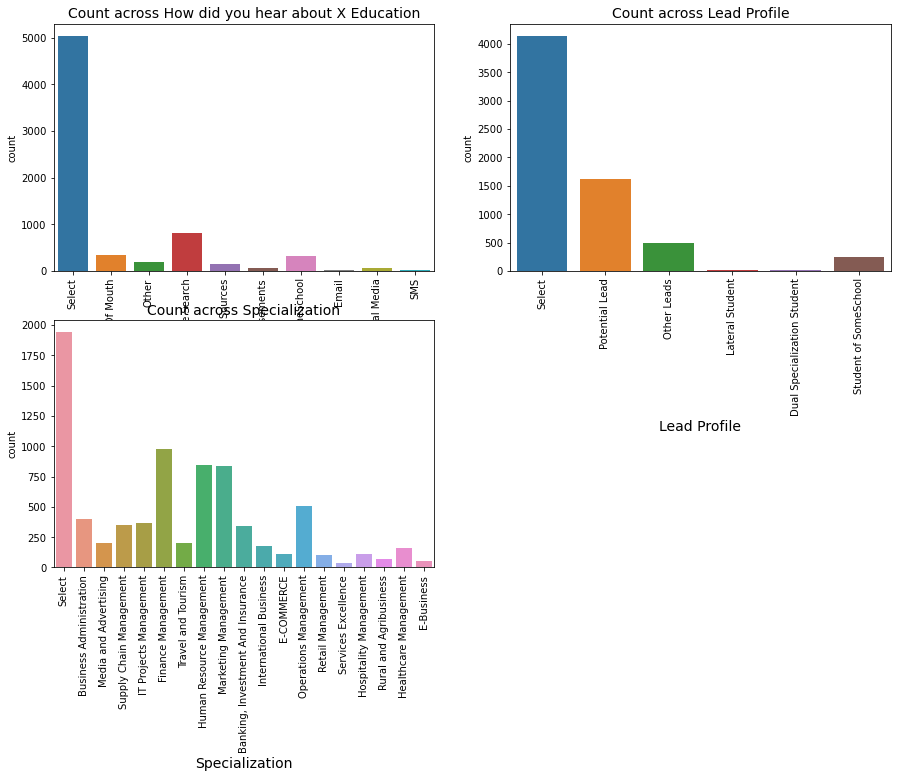

In [233]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data[x])
    plt.title('Count across'+' '+ x, size = 14)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)

In [234]:
# Consider Specialization column
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [235]:
 # Impute with Nan values
data['Specialization'] = data['Specialization'].replace('Select', np.nan)

In [236]:
# Consider `How did you hear about X Education` column
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [237]:
 # Impute with Nan values
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace('Select',np.nan)

In [238]:
# Consider `City` column
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [239]:
 # Impute with Nan values
data['City']= data['City'].replace('Select',np.nan)

In [240]:
# Consider `Lead Profile` column
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [241]:
 # Impute with Nan values
data['Lead Profile']= data['Lead Profile'].replace('Select',np.nan)

In [242]:
#checking for null values
data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [243]:
#checking for percentage of missng values
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Lead Numbe

In [244]:
#Dropping the columns which have more than 40% missing values
data.drop(data.loc[:,list(round((data.isnull().sum()/len(data.index)*100),2)>40)].columns,axis =1, inplace = True)

In [245]:
#checking if there any rows which have more than 50% missing values
data[data.isnull().sum(axis = 1) > 14]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


In [246]:
data.shape

(9240, 24)

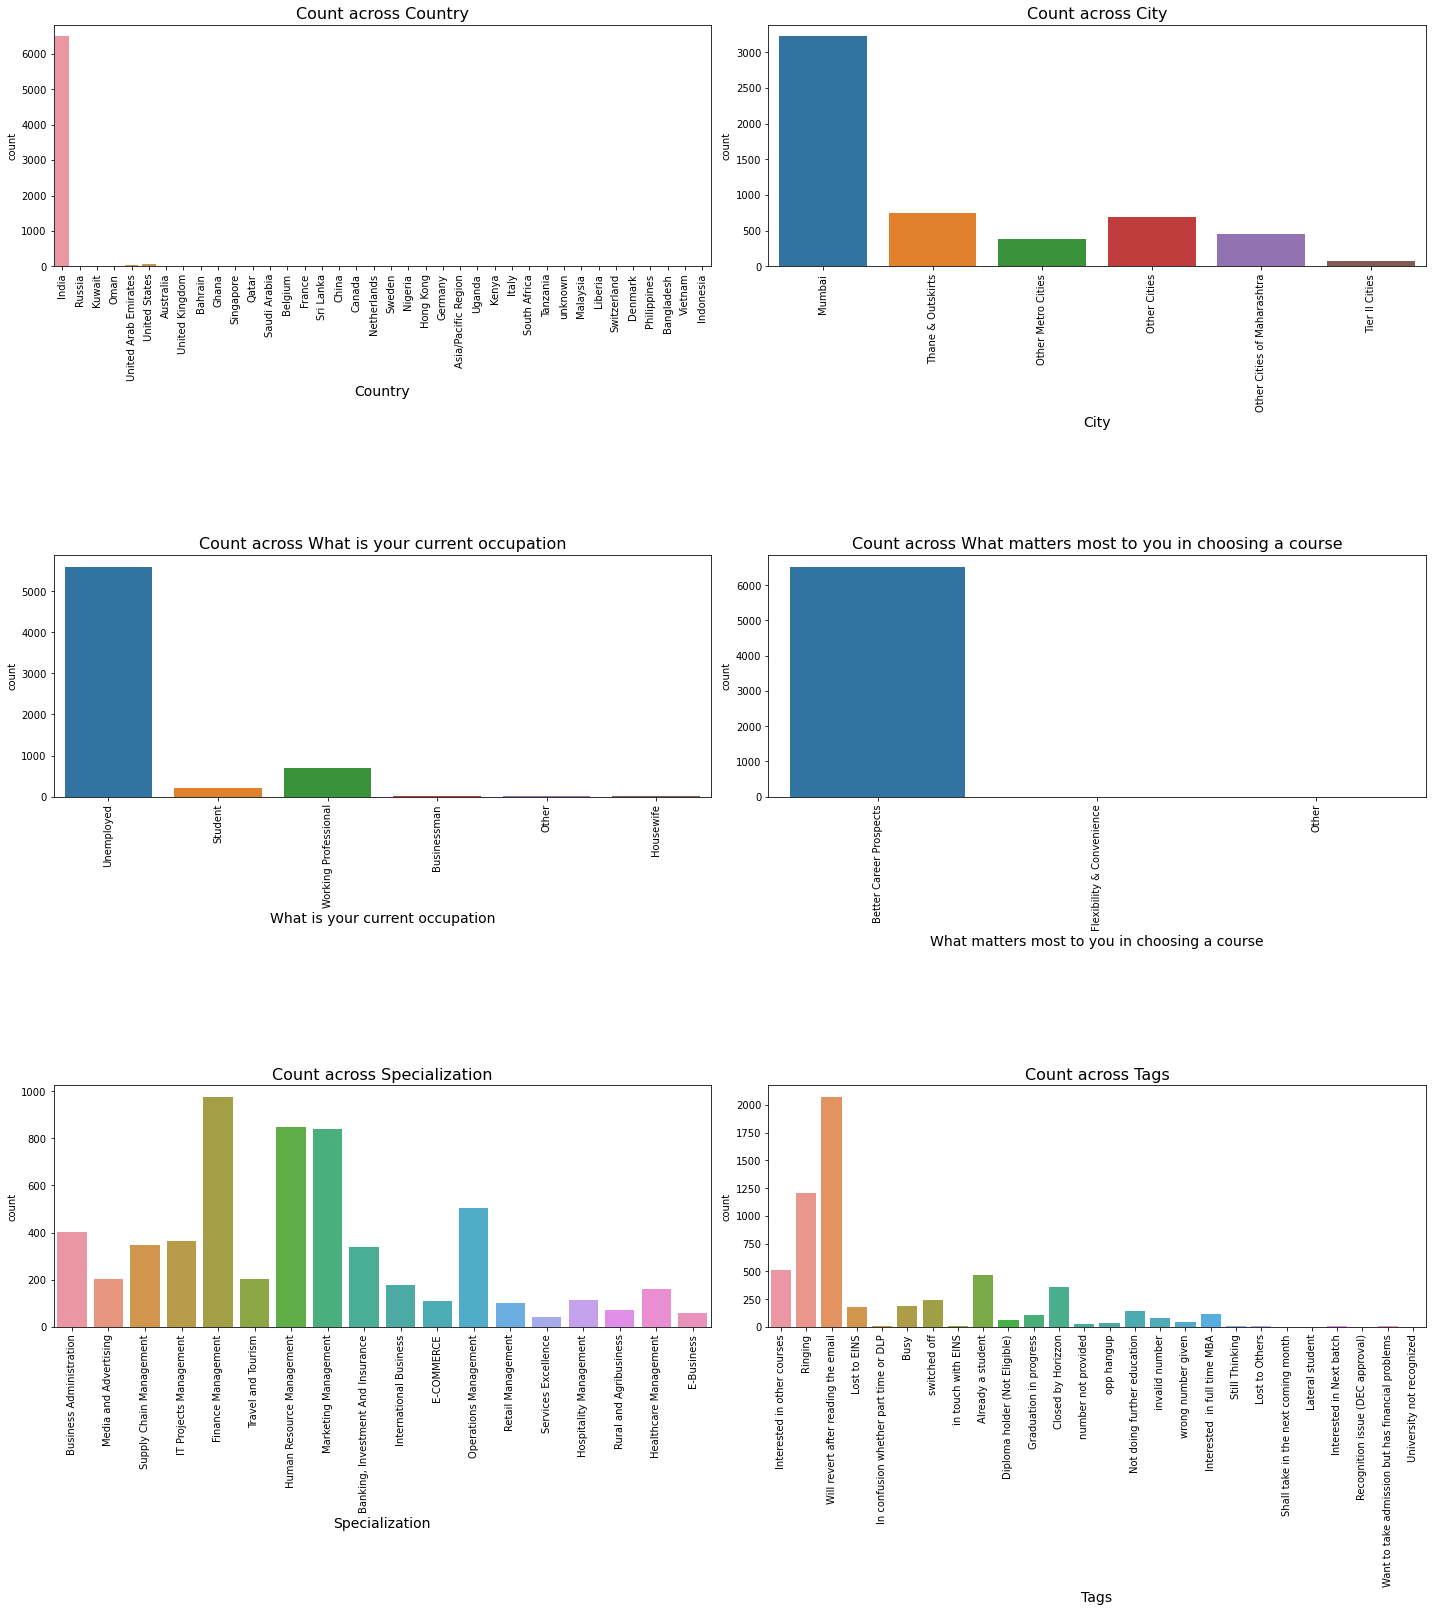

In [247]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(data[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
plt.figure(figsize=(20,26))

countplot('Country',1)
countplot('City',2)
countplot('What is your current occupation',3)
countplot('What matters most to you in choosing a course',4)
countplot('Specialization',5)
countplot('Tags',6)

plt.tight_layout()

In [248]:
#checking for percentage of missng values
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

In [249]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [250]:
# imputting missing values for 'city'
print("Before 'City' Column, No. of Missing values is :",data['City'].isnull().sum())
data['City'].fillna(data.City.mode()[0],inplace = True)
print("After removed Missing values is :",data['City'].isnull().sum())

# imputting missing values 'What matters most to you in choosing a course'
print("Before 'What matters most to you in choosing a course' Column, No. of Missing values is :",data['What matters most to you in choosing a course'].isnull().sum())
data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0],inplace = True)
print("After removed Missing values is :",data['What matters most to you in choosing a course'].isnull().sum())

# imputting missing values 'What is your current occupation'
print("Before 'What is your current occupation' Column, No. of Missing values is :",data['What is your current occupation'].isnull().sum())
data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0],inplace = True)
print("After removed Missing values is :",data['What is your current occupation'].isnull().sum())

# Club all the management specialisations in one category called 'Management'
club = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
data['Specialization'] = data['Specialization'].replace(club,'Management')

# Let us replace E-Commerce specialisations by'E-Business' as E-Commerce is a subset of E-business.
df['Specialization'] = df['Specialization'].replace('E-COMMERCE','E-Business')

# imputting missing values 'Specialization'
print("Before Specialization Column, No. of Missing values is :",data['Specialization'].isnull().sum())
data['Specialization'] = data['Specialization'].replace(np.nan,'Others')
print("After removed Missing values is :",data['Specialization'].isnull().sum())


Before 'City' Column, No. of Missing values is : 3669
After removed Missing values is : 0
Before 'What matters most to you in choosing a course' Column, No. of Missing values is : 2709
After removed Missing values is : 0
Before 'What is your current occupation' Column, No. of Missing values is : 2690
After removed Missing values is : 0
Before Specialization Column, No. of Missing values is : 3380
After removed Missing values is : 0


In [251]:
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False).head()

Tags                    36.29
Country                 26.63
TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
dtype: float64

In [252]:
data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [253]:
# Club all the Similar tags in one category 

data['Tags'] = data['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
data['Tags'] = data['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
data['Tags'] = data['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')
data['Tags'] = data['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')


In [254]:
data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in 

In [255]:
data['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [256]:
# imputting missing values 'Tags'
print("Before Tags Column, No. of Missing values is :",data['Tags'].isnull().sum())
data['Tags'] = data['Tags'].replace(np.nan,'Others')
print("After removed missing value, No. of Missing values is :",data['Tags'].isnull().sum())

#choosing mode imputation for country
print("Before Country Column, No. of Missing values is :",data['Country'].isnull().sum())
data['Country'].fillna(data.Country.mode()[0],inplace = True)
print("After removed missing values, No. of Missing values is :",data['Country'].isnull().sum())


Before Tags Column, No. of Missing values is : 3353
After removed missing value, No. of Missing values is : 0
Before Country Column, No. of Missing values is : 2461
After removed missing values, No. of Missing values is : 0


In [257]:
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [258]:
data['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [259]:
# Club all the Similar tags in one category
unite =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
data['Last Activity'] = data['Last Activity'].replace(unite,'others')

In [260]:
data['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

In [261]:
# imputation for 'Last Activity' column
print("Before Last ACtivity Column, No. of Missing values is :",data['Last Activity'].isnull().sum())
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
print("After removed missing values, No. of Missing values is :",data['Last Activity'].isnull().sum())

Before Last ACtivity Column, No. of Missing values is : 103
After removed missing values, No. of Missing values is : 0


In [262]:
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Lead Source             0.39
Lead Number             0.00
Search                  0.00
dtype: float64

In [263]:
data['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [264]:
# Club similar categories to avoid confusion
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
# Combine Sources that have less value counts
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
data['Lead Source'] = data['Lead Source'].replace(less_count,'Others')

In [265]:
# imputation for 'Lead source' column
print("Before Lead Source Column, No. of Missing values is :",data['Lead Source'].isnull().sum())
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
print("After removed missing values,No. of Missing values is :",data['Lead Source'].isnull().sum())

Before Lead Source Column, No. of Missing values is : 36
After removed missing values,No. of Missing values is : 0


In [266]:
# Now again check the null percentage
round((data.isnull().sum()/len(data.index) *100),2).sort_values(ascending = False).head()

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Number                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [267]:
#We choose to drop these rows as they are very less nearly 2%
data.dropna(inplace = True)

In [268]:
#checking missing values in leftover columns

round(100*(data.isnull().sum()/len(data.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [269]:
# We obsserve that TotalVisits have wrong data type
data['TotalVisits'] = data['TotalVisits'].astype('int64')

In [270]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [271]:
# Combine together all those categories whose have very few last notable ativity count

compress = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
data['Last Notable Activity'] = data['Last Notable Activity'].replace(compress,'Other')


In [272]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

# EDA

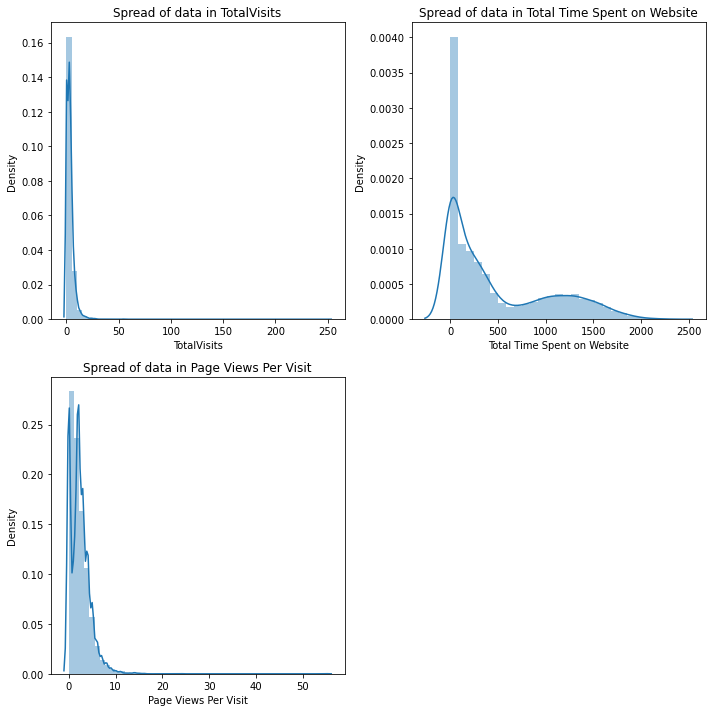

In [273]:
#Lets see the trend of the data

def trend(x, fig):
    plt.subplot(2,2,fig) 
    sns.distplot(data[x])
    plt.title('Spread of data in'+' '+ x)
    plt.xlabel(x)
    
plt.figure(figsize=(10,10))

trend('TotalVisits',1)
trend('Total Time Spent on Website',2)
trend('Page Views Per Visit',3)

plt.tight_layout()

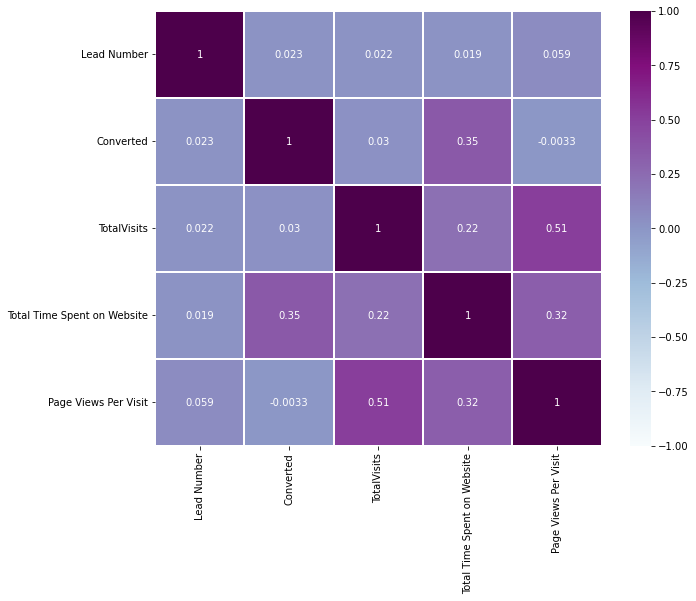

In [274]:
# Observing Correlation
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), annot=True,cmap="BuPu", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

# Handling high data imbalance

In [275]:
#Checking Data imbalance exists or not
round(((sum(data['Converted'])/len(data.index))*100),2)

38.02

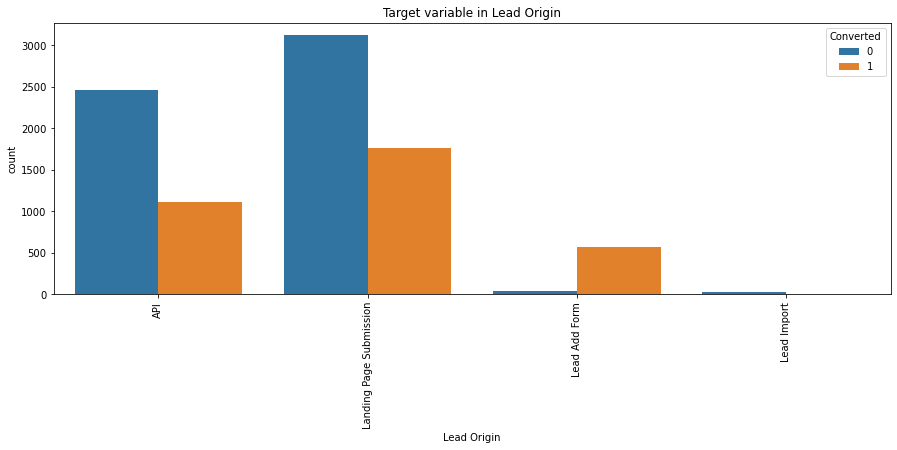

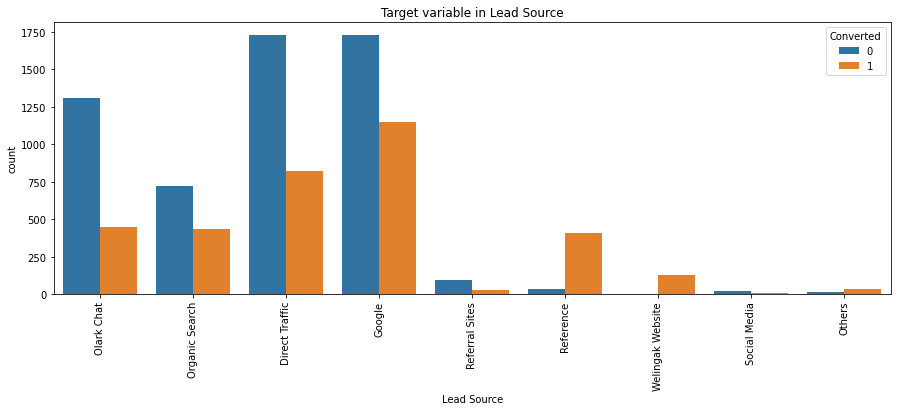

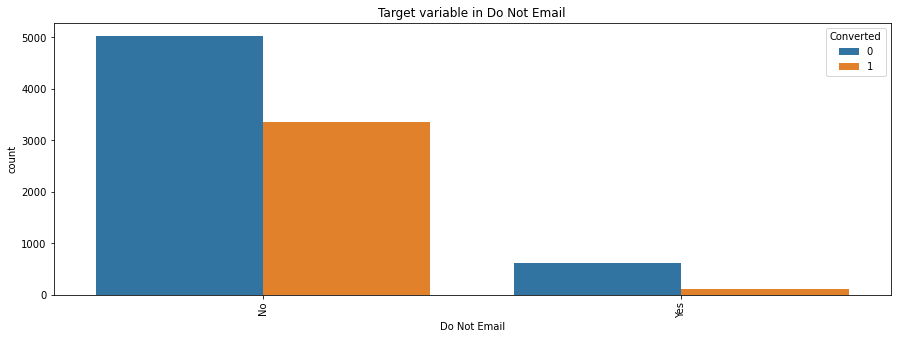

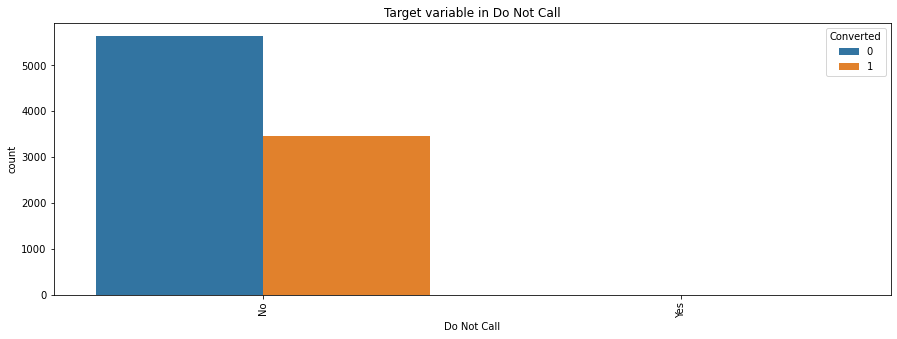

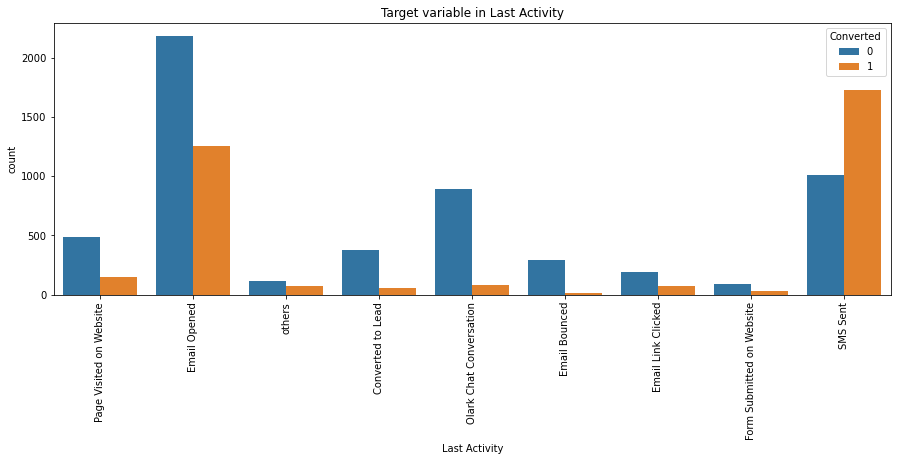

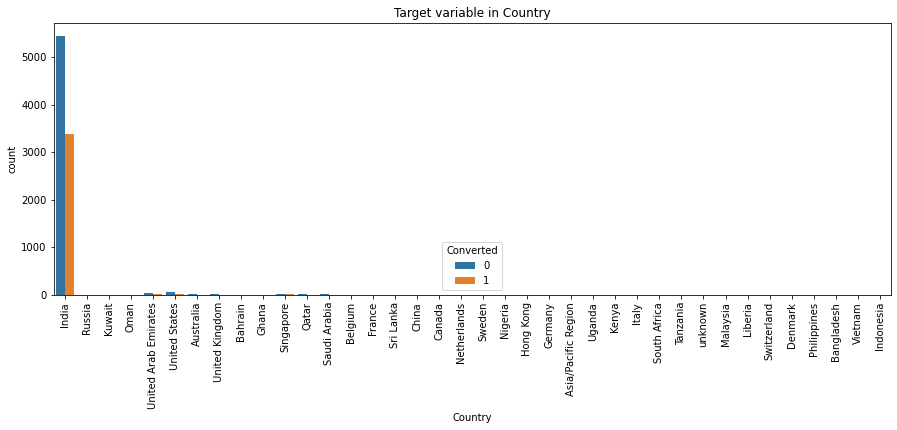

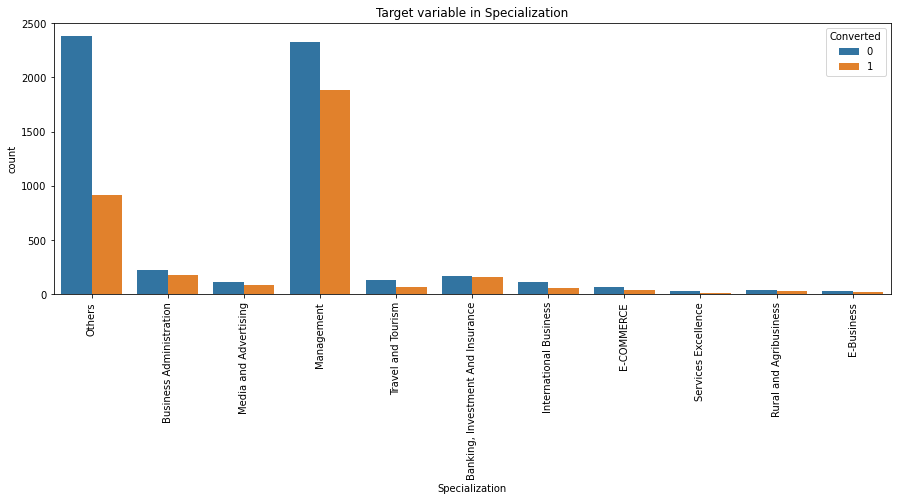

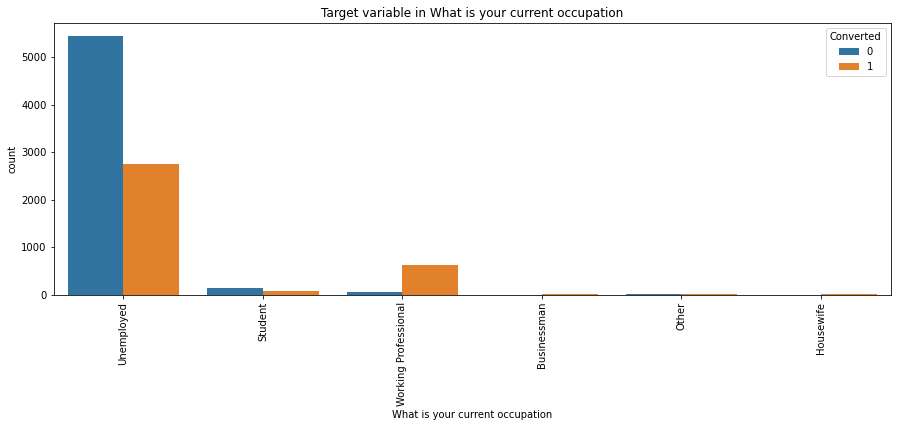

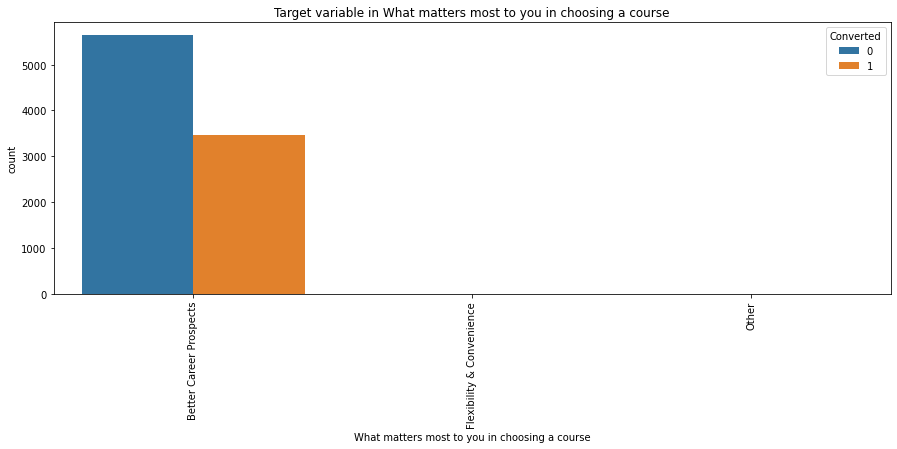

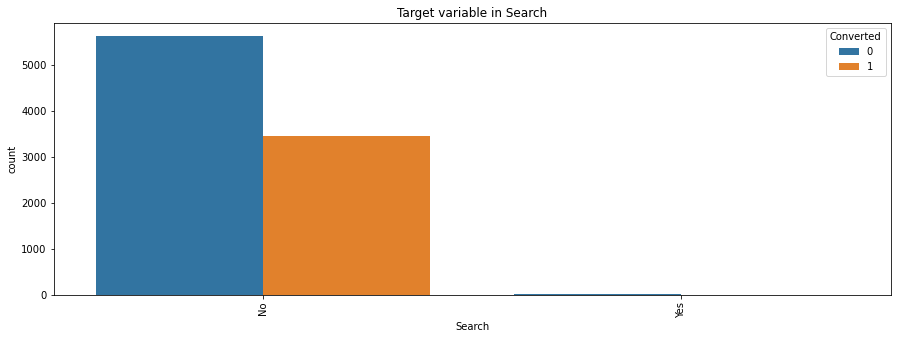

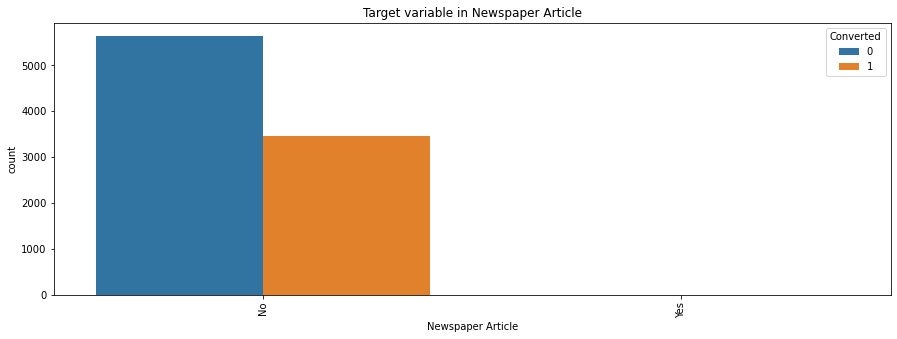

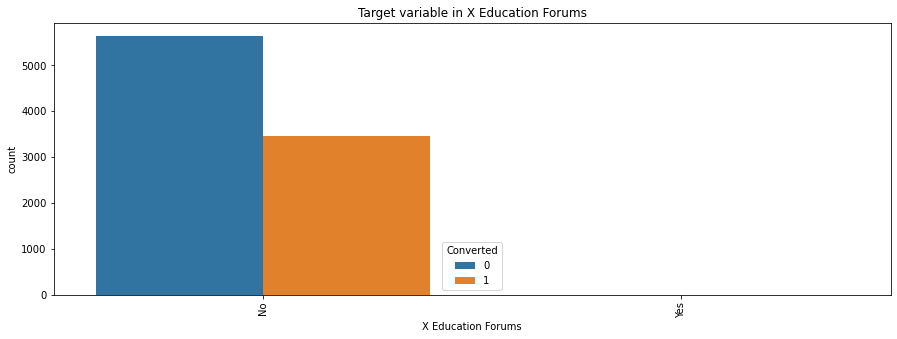

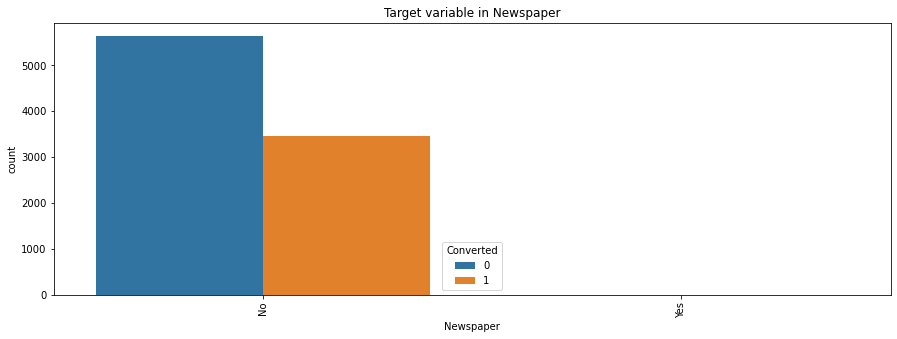

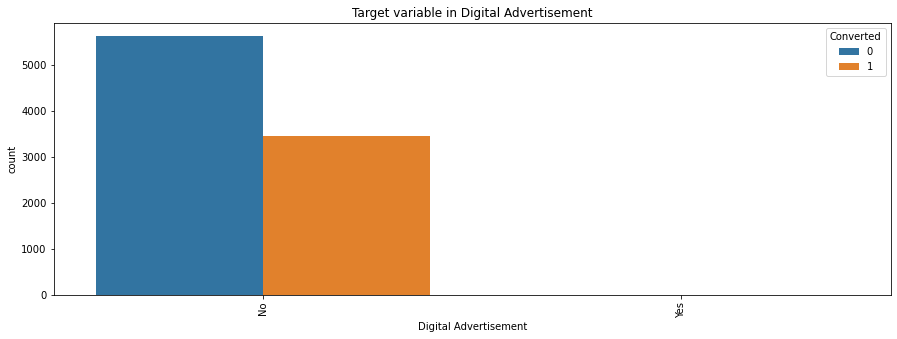

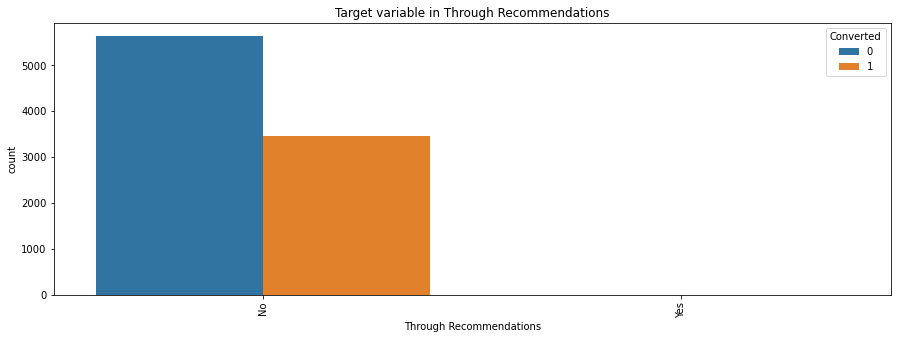

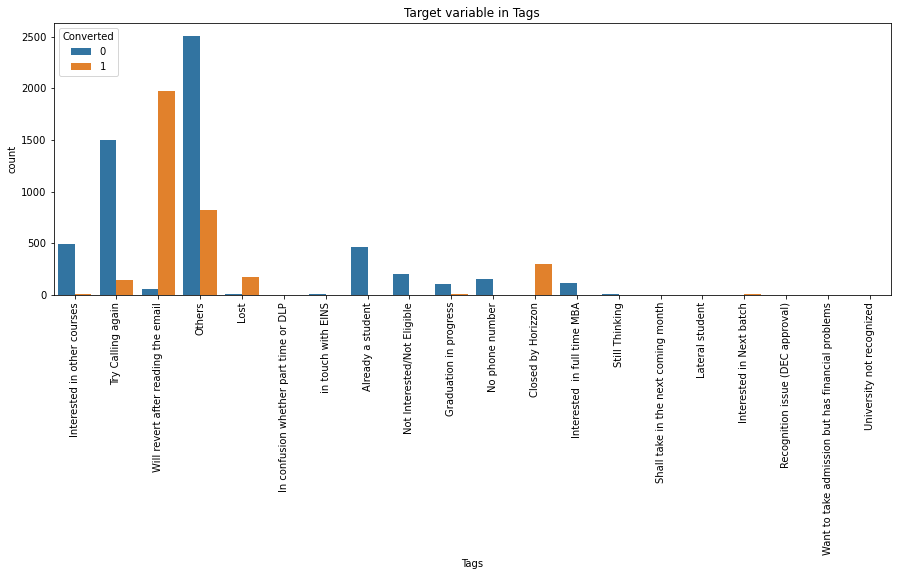

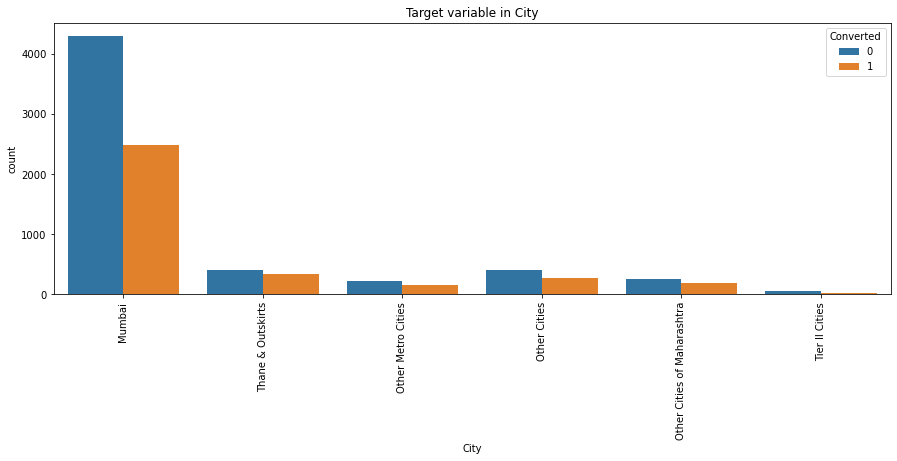

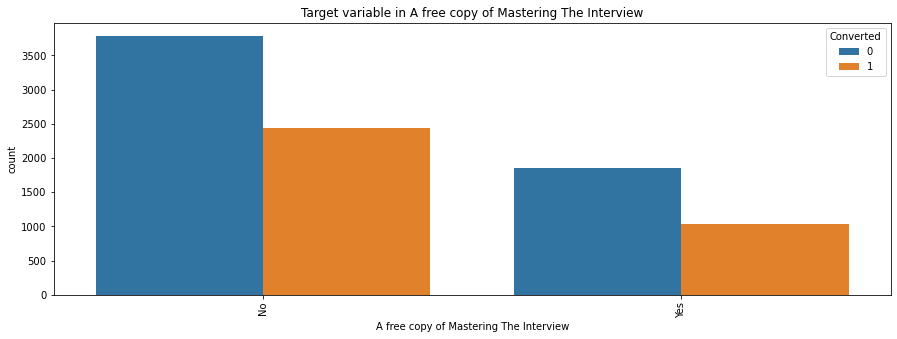

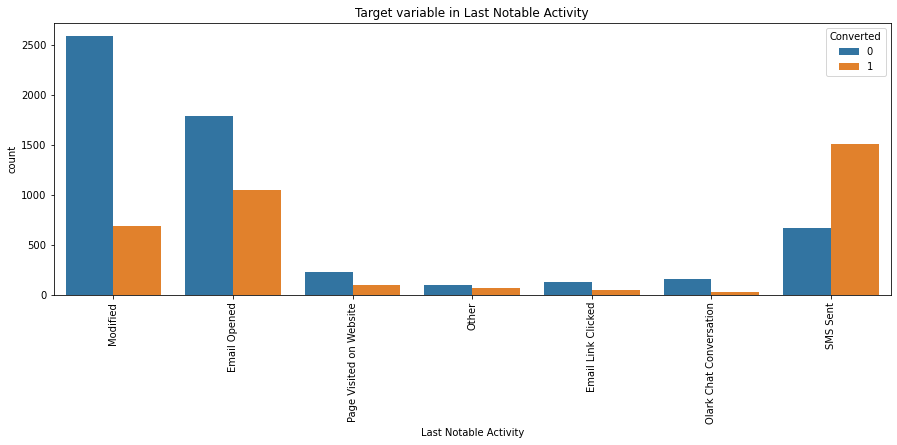

In [276]:
conv = data.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(data[i], hue=data.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [277]:
# Dropping the column 'country'
imbalance_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
data = data.drop(imbalance_data,axis =1)

In [278]:
data.shape

(9103, 15)

In [279]:
# Checking percentile values 
data[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,481.350104,3.445238,2.362820
std,545.066142,4.854853,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000
50%,244.000000,3.000000,2.000000
75%,919.500000,5.000000,3.000000
90%,1372.000000,7.000000,5.000000


In [280]:
# removing outliers using the IQR
Q1 = data['TotalVisits'].quantile(0.01)
Q3 = data['TotalVisits'].quantile(0.99)
data = data.loc[(data['TotalVisits'] >= Q1) & (data['TotalVisits'] <= Q3)]

Q1 = data['Page Views Per Visit'].quantile(0.01)
Q3 = data['Page Views Per Visit'].quantile(0.99)
data=data.loc[(data['Page Views Per Visit'] >= Q1) & (data['Page Views Per Visit'] <= Q3)]

Q1 = data['Total Time Spent on Website'].quantile(0.01)
Q3 = data['Total Time Spent on Website'].quantile(0.99)
data=data.loc[(data['Total Time Spent on Website'] >= Q1) & (data['Total Time Spent on Website'] <= Q3)]

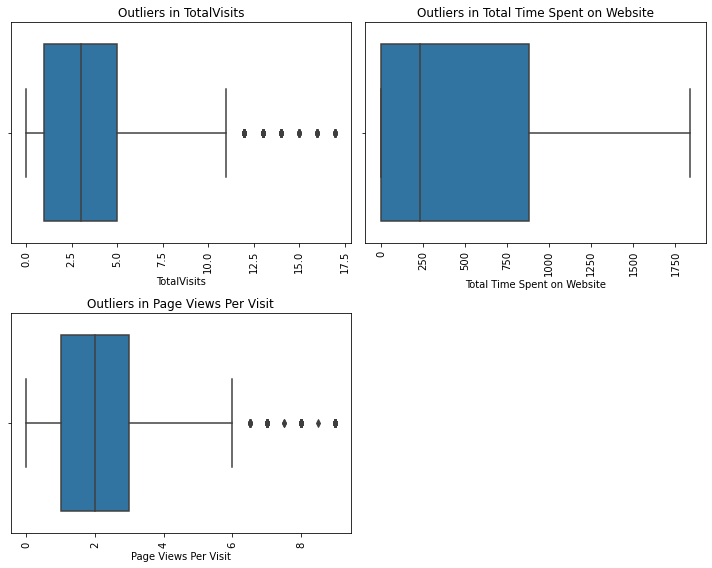

In [281]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = data)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [282]:
data.shape

(8863, 15)

# Bivariate Analysis

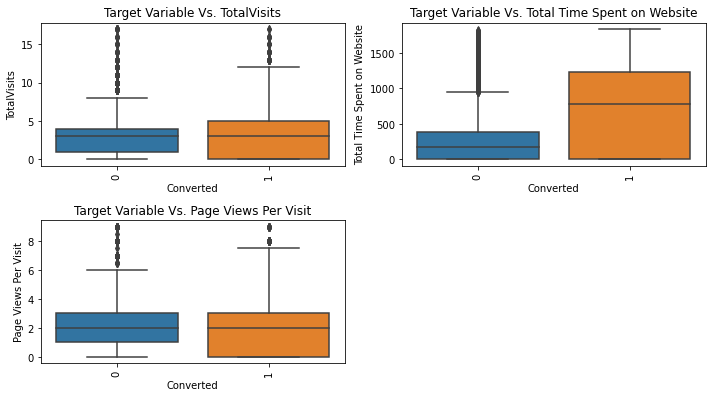

In [283]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

# Data preparation for model building

In [284]:
# Copy the dataset before proceeding with dummy creations
df = data.copy()
#Converting Binary variables yes/No to 0 or 1

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [285]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
df[cols] = df[cols].apply(binary_map)

In [286]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [287]:
# Creating dummy variables for the categorical variables and dropping the first one
cols1 = [i for i in df.select_dtypes(include ='object').columns if len(df[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(data[cols1], drop_first= True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [288]:
#concatenating the dummy variables with Original DataFrame
df = pd.concat([df,dummy1], axis =1)
df.shape

(8863, 79)

In [289]:
cols1 = [i for i in df.select_dtypes(include ='object').columns if len(df[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
df.drop(cols1, axis =1, inplace = True)
df.shape

(8863, 71)

In [290]:
#Seprarting Target Column from original Dataframe.
y = df['Converted']
X = df.drop(['Converted','Lead Number'],axis = 1)

In [291]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [292]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [293]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8, random_state = 100)

In [294]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (7090, 69)
y_train Size (7090,)


# Feature Scaling

In [295]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()                                                                                                            

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4798,0,-0.734788,-0.379163,-0.664496,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6733,0,-0.388448,1.692840,-0.664496,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5301,0,-0.042108,-0.724815,-0.400525,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6251,0,-1.081129,-0.875680,-1.192439,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
445,0,0.650573,0.390438,1.447276,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Model Building

In [296]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7090
Model:                            GLM   Df Residuals:                     7020
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.2
Date:                Sun, 13 Nov 2022   Deviance:                       2814.3
Time:                        20:17:33   Pearson chi2:                 8.36e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6029
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -8.4974      3.577     -2.375      0.018     -15.509      -1.486
Do Not Email                                              -0.6628      0.275     -2.409      0.016      -1.202      -0.124
TotalVisits                                                0.2887      0.076      3.818      0.000       0.140       0.437
Total Time Spent on Website                                1.1279      0.059     19.259      0.000       1.013       1.243
Page Views Per Visit                                      -0.2539      0.088     -2.898      0.004      -0.426      -0.082
A free copy of Mastering The Interview                    -0.0692      0.168     -0.412      0.681      -0.399       0.260
Lead Origin_Landing Page Submission                       -0.2763      0.221     -1.252      0.211      -0.709       0.156
Lead Origin_Lead Add Form                                  1.4925      1.142      1.306      0.191      -0.747       3.732
Lead Origin_Lead Import                                  -17.9253   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.2095      0.174      1.204      0.229      -0.132       0.551
Lead Source_Olark Chat                                     1.4368      0.237      6.074      0.000       0.973       1.900
Lead Source_Organic Search                                 0.0453      0.203      0.223      0.823      -0.352       0.442
Lead Source_Others                                         1.4226      0.947      1.502      0.133      -0.434       3.279
Lead Source_Reference                                     -0.4866      1.202     -0.405      0.686      -2.842       1.869
Lead Source_Referral Sites                                 0.3468      0.435      0.797      0.426      -0.506       1.200
Lead Source_Social Media                                  18.5376   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.2292      1.358      3.115      0.002       1.568       6.890
Last Activity_Email Bounced                               -0.8507      0.676     -1.258      0.208      -2.176       0.474
Last Activity_Email Link Clicked                           1.1029      0.579      1.906      0.057      -0.031       2.237
Last Activity_Email Opened                                 0.4365      0.389      1.123      0.261      -0.325       1.198
Last Activity_Form Submitted on Website                    0.9907      0.583      1.700      0.089      -0.152       2.133
Last Activity_Olark Chat Conversation                     -0.3984      0.402     -0.991      0.322      -1.186       0.389
Last Act

In [297]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg,n_features_to_select =  15)
rfe = rfe.fit(X_train,y_train)

In [298]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Page Visited on Website', False, 52),
 ('Last Activity_SMS Sent', True, 1),
 ('Last

In [299]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

# MODEL - 1

In [300]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7090
Model:                            GLM   Df Residuals:                     7074
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1468.5
Date:                Sun, 13 Nov 2022   Deviance:                       2936.9
Time:                        20:17:43   Pearson chi2:                 8.05e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5959
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8855      0.134    -29.018      0.000      -4.148      -3.623
Total Time Spent on Website                       1.1192      0.056     20.060      0.000       1.010       1.229
Lead Origin_Lead Add Form                         1.2509      0.352      3.554      0.000       0.561       1.941
Lead Source_Olark Chat                            1.5058      0.136     11.066      0.000       1.239       1.773
Lead Source_Others                                1.6054      0.711      2.258      0.024       0.212       2.999
Lead Source_Welingak Website                      4.4512      0.804      5.535      0.000       2.875       6.027
Last Activity_SMS Sent                            2.0100      0.106     18.902      0.000       1.802       2.218
Tags_Closed by Horizzon                           9.9214      1.031      9.625      0.000       7.901      11.942
Tags_Interested in Next batch                    22.7019   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
Tags_Lateral student                             24.3424   1.64e+04      0.001      0.999   -3.21e+04    3.22e+04
Tags_Lost                                         7.3555      0.435     16.921      0.000       6.504       8.208
Tags_No phone number                             -2.4258      1.034     -2.347      0.019      -4.452      -0.400
Tags_Others                                       2.0982      0.125     16.733      0.000       1.852       2.344
Tags_Will revert after reading the email          6.7253      0.206     32.684      0.000       6.322       7.129
Last Notable Activity_Modified                   -1.7198      0.118    -14.580      0.000      -1.951      -1.489
Last Notable Activity_Olark Chat Conversation    -2.2698      0.449     -5.053      0.000      -3.150      -1.389
=================================================================================================================
"""

In [301]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.93
2,Lead Source_Olark Chat,1.64
11,Tags_Others,1.61
12,Tags_Will revert after reading the email,1.60
0,Total Time Spent on Website,1.47
5,Last Activity_SMS Sent,1.44
13,Last Notable Activity_Modified,1.39
4,Lead Source_Welingak Website,1.37
6,Tags_Closed by Horizzon,1.22
14,Last Notable Activity_Olark Chat Conversation,1.08


# MODEL - 2

In [302]:
# Dropping 'Tags_Lateral student' has high p value
cols = cols.drop('Tags_Lateral student')
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7090
Model:                            GLM   Df Residuals:                     7075
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1476.5
Date:                Sun, 13 Nov 2022   Deviance:                       2953.0
Time:                        20:17:43   Pearson chi2:                 7.97e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5950
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8663      0.133    -29.081      0.000      -4.127      -3.606
Total Time Spent on Website                       1.1153      0.056     20.064      0.000       1.006       1.224
Lead Origin_Lead Add Form                         1.3412      0.352      3.813      0.000       0.652       2.030
Lead Source_Olark Chat                            1.5102      0.136     11.127      0.000       1.244       1.776
Lead Source_Others                                1.5573      0.711      2.190      0.028       0.164       2.951
Lead Source_Welingak Website                      4.3623      0.804      5.426      0.000       2.787       5.938
Last Activity_SMS Sent                            2.0183      0.106     19.029      0.000       1.810       2.226
Tags_Closed by Horizzon                           9.8401      1.029      9.561      0.000       7.823      11.857
Tags_Interested in Next batch                    22.6325   1.66e+04      0.001      0.999   -3.25e+04    3.26e+04
Tags_Lost                                         7.3092      0.434     16.844      0.000       6.459       8.160
Tags_No phone number                             -2.4495      1.033     -2.370      0.018      -4.475      -0.424
Tags_Others                                       2.0685      0.124     16.624      0.000       1.825       2.312
Tags_Will revert after reading the email          6.6826      0.204     32.728      0.000       6.282       7.083
Last Notable Activity_Modified                   -1.6959      0.117    -14.465      0.000      -1.926      -1.466
Last Notable Activity_Olark Chat Conversation    -2.2600      0.448     -5.042      0.000      -3.139      -1.381
=================================================================================================================
"""

In [303]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.924624
2,Lead Source_Olark Chat,1.638712
10,Tags_Others,1.609259
11,Tags_Will revert after reading the email,1.600011
0,Total Time Spent on Website,1.470113
5,Last Activity_SMS Sent,1.433384
12,Last Notable Activity_Modified,1.392632
4,Lead Source_Welingak Website,1.365387
6,Tags_Closed by Horizzon,1.221251
13,Last Notable Activity_Olark Chat Conversation,1.077804


# MODEL - 3

In [304]:
# Dropping "Tags_Interested in Next batch"and "Lead Source_Others" has high p value
cols = cols.drop(["Tags_Interested in Next batch","Lead Source_Others"])
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7090
Model:                            GLM   Df Residuals:                     7077
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1482.7
Date:                Sun, 13 Nov 2022   Deviance:                       2965.4
Time:                        20:19:05   Pearson chi2:                 8.00e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5943
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8472      0.132    -29.105      0.000      -4.106      -3.588
Total Time Spent on Website                       1.1140      0.055     20.112      0.000       1.005       1.223
Lead Origin_Lead Add Form                         1.6284      0.340      4.783      0.000       0.961       2.296
Lead Source_Olark Chat                            1.4977      0.135     11.073      0.000       1.233       1.763
Lead Source_Welingak Website                      4.0623      0.798      5.090      0.000       2.498       5.627
Last Activity_SMS Sent                            2.0223      0.106     19.100      0.000       1.815       2.230
Tags_Closed by Horizzon                           9.7112      1.026      9.469      0.000       7.701      11.721
Tags_Lost                                         7.2848      0.434     16.794      0.000       6.435       8.135
Tags_No phone number                             -2.4672      1.033     -2.387      0.017      -4.493      -0.442
Tags_Others                                       2.0608      0.124     16.658      0.000       1.818       2.303
Tags_Will revert after reading the email          6.6428      0.203     32.761      0.000       6.245       7.040
Last Notable Activity_Modified                   -1.7007      0.117    -14.511      0.000      -1.930      -1.471
Last Notable Activity_Olark Chat Conversation    -2.2584      0.448     -5.046      0.000      -3.136      -1.381
=================================================================================================================
"""

In [305]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.837830
2,Lead Source_Olark Chat,1.638355
8,Tags_Others,1.607172
9,Tags_Will revert after reading the email,1.598290
0,Total Time Spent on Website,1.469577
4,Last Activity_SMS Sent,1.430994
10,Last Notable Activity_Modified,1.392588
3,Lead Source_Welingak Website,1.346439
5,Tags_Closed by Horizzon,1.215170
11,Last Notable Activity_Olark Chat Conversation,1.077783


# Final variables selected in the  model:

In [306]:
print("The final Variables selected are:")
cols

The final Variables selected are:


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

# Predictions on the Train Set

In [307]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4798    0.000217
6733    0.990820
5301    0.093458
6251    0.220253
445     0.005983
6560    0.991714
4267    0.002499
8825    0.034723
4865    0.998870
4558    0.008593
dtype: float64

In [308]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.16568462e-04, 9.90820118e-01, 9.34577603e-02, 2.20253297e-01,
       5.98280642e-03, 9.91714352e-01, 2.49899274e-03, 3.47229754e-02,
       9.98870323e-01, 8.59260622e-03])

In [309]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,4798,0,0.000217
1,6733,1,0.990820
2,5301,0,0.093458
3,6251,1,0.220253
4,445,0,0.005983


In [310]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [311]:
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,4798,0,0.000217,0
1,6733,1,0.990820,1
2,5301,0,0.093458,0
3,6251,1,0.220253,0
4,445,0,0.005983,0


In [313]:
# Confusion matrix for the target column : `converted `
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn import metrics
confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[4254  196]
 [ 372 2268]]


In [314]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4450
           1       0.92      0.86      0.89      2640

    accuracy                           0.92      7090
   macro avg       0.92      0.91      0.91      7090
weighted avg       0.92      0.92      0.92      7090



Summary:

a.Accuracy - 92%.
b.Precision - 92%
c.Recall - 86%

# Other Metrics

In [316]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [317]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8590909090909091

In [318]:
# Let us calculate specificity
TN / float(TN+FP)

0.9559550561797753

In [319]:
# positive predictive value 
print (TP / float(TP+FP))

0.9204545454545454


In [320]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9195849546044098


In [321]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04404494382022472


# ROC Curve

In [322]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [323]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

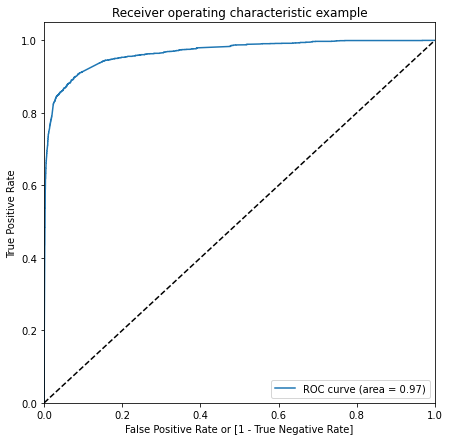

In [324]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Predictions on the test set

In [325]:
# Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8786,0,-1.081129,-0.875680,-1.192439,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7813,0,-0.042108,-0.379163,0.391390,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2405,0,1.343253,0.117354,0.655361,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7246,0,-0.042108,-0.512841,0.391390,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5366,0,0.996913,0.510748,-0.136553,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [326]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8786,-0.875680,1,0,1,0,0,0,0,1,0,1,0
7813,-0.379163,0,0,0,0,0,0,0,0,0,1,0
2405,0.117354,0,0,0,1,0,0,0,0,1,0,0
7246,-0.512841,0,1,0,0,0,0,0,1,0,1,0
5366,0.510748,0,0,0,0,0,0,0,0,0,1,0


In [327]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [328]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8786    0.773489
7813    0.002547
2405    0.992957
7246    0.071715
5366    0.006835
3924    0.049039
3349    0.013284
916     0.011443
7732    0.068990
1703    0.063975
dtype: float64

In [329]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [330]:
y_pred_df.head()

,0
8786,0.773489
7813,0.002547
2405,0.992957
7246,0.071715
5366,0.006835


In [331]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [332]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [333]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,8786,0.773489
1,0,7813,0.002547
2,1,2405,0.992957
3,0,7246,0.071715
4,0,5366,0.006835


In [335]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,1,8786,0.773489
1,0,7813,0.002547
2,1,2405,0.992957
3,0,7246,0.071715
4,0,5366,0.006835


In [336]:
# Creating new column "Lead Score" with 1 to 100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Lead ID,Converted_prob,Lead_Score
0,1,8786,0.773489,77
1,0,7813,0.002547,0
2,1,2405,0.992957,99
3,0,7246,0.071715,7
4,0,5366,0.006835,1


In [338]:
#Taking 0.33 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Converted,Lead ID,Converted_prob,Lead_Score,final_predicted
0,1,8786,0.773489,77,1
1,0,7813,0.002547,0,0
2,1,2405,0.992957,99,1
3,0,7246,0.071715,7,0
4,0,5366,0.006835,1,0


In [339]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.9216018048505358


In [341]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1078
           1       0.90      0.91      0.90       695

    accuracy                           0.92      1773
   macro avg       0.92      0.92      0.92      1773
weighted avg       0.92      0.92      0.92      1773



Summary:

a.Accuracy - 92%.
b.Precision - 90%
c.Recall - 91%

# Conclusion

In [ ]:
# 1.Top three features that consider to decision
    * Lead Origin
    * Total Time Spent on Website
    * Last Activity
    
# 2.Top three categories that contribute to decision
    * Lead Origin ==> Lead Add Form
    * Total Time Spent on Website ==> The total time spent by the customer on the website.
    * Last Activity ==> SMS Sent